In [1]:
from ot_simple_connector.connector import Connector
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools


In [2]:
pl_cache_filename = 'c:\\tmp\\pipelines.csv'
full_df = None
try:
    full_df = pd.read_csv(pl_cache_filename)
except:
    pass

if full_df is None:
#     schema_id = 1750000002
    conn = Connector(host="192.168.4.65", port='80', user="admin", password="12345678")
    query = '| __read__ path=pipeline/pipeline'
#     query +='| where schema_id={schema_id}'
    job = conn.jobs.create(query_text=query, cache_ttl=60, tws=0, twf=0)
    print(job.status)
    res = job.dataset.load()
    full_df = pd.DataFrame(res)
    full_df.to_csv(pl_cache_filename)
full_df

,Unnamed: 0,schema_id,pipeline_id,part_id,node_id_end,node_id_start,L,simple_part_id,node_name_start,altitude_start,...,D,S,thread_number,pipe_material,cover_ext,cover_int,pipeline_type,placing,mestor_name,schema_name
0,0,1750000340,1750008626,1750006155,1750010074,1750003863,2200.0,1750006817,ДНС-1 Южно-Аганская,56.00,...,219.0,6.0,1,сталь Вст3сп,Мастика битумно-резиновая МБР-90,- Нет данных -,Все трубопроводы транспортирующие газ,ГПЗ-НВ,Южно-Аганское,"ГП ОАО ""СН-МНГ"""
1,1,1750000340,1750008768,1750024179,1750046080,1750029687,50265.0,1750027399,ДНС -1 ЗУБ,40.90,...,219.0,8.0,1,сталь 13ХФА,NaN,NaN,Все трубопроводы транспортирующие газ,ЮБ ГПК,Западно-Усть-Балыкское,"ГП ОАО ""СН-МНГ"""
2,2,1750000340,1750003614,1750017628,1750045679,1750022240,1900.0,1750019877,т.ПК-330(820/530),0.00,...,530.0,8.0,1,сталь 09ГСФ,NaN,NaN,Все трубопроводы транспортирующие газ,ГПЗ-НВ,Аганское,"ГП ОАО ""СН-МНГ"""
3,3,1750000340,1750003614,1750017628,1750045680,1750045679,200.0,1750037190,ПК-349,0.00,...,530.0,8.0,1,сталь 09ГСФ,NaN,NaN,Все трубопроводы транспортирующие газ,ГПЗ-НВ,Аганское,"ГП ОАО ""СН-МНГ"""
4,4,1750000340,1750003614,1750017628,1750022243,1750045680,7730.0,1750037191,ПК-352,0.00,...,530.0,8.0,1,сталь 09ГСФ,NaN,NaN,Все трубопроводы транспортирующие газ,ГПЗ-НВ,Аганское,"ГП ОАО ""СН-МНГ"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,11974,1750001158,1750009916,1750022516,1750029691,1750033926,383.0,1750027397,т.вр.н/с к.6б,40.00,...,219.0,10.0,1,сталь 13ХФА,NaN,есть,Все трубопроводы транспортирующие нефть,ДНС -1 ЗУБ,Западно-Усть-Балыкское,НС Западно-Усть-Балыкское м/р ДНС-1
11975,11975,1750001158,1750009916,1750022516,1750033926,1750025216,95.0,1750025363,к.6,34.41,...,219.0,10.0,1,сталь 13ХФА,NaN,есть,Все трубопроводы транспортирующие нефть,ДНС -1 ЗУБ,Западно-Усть-Балыкское,НС Западно-Усть-Балыкское м/р ДНС-1
11976,11976,1750001158,1750009916,1750022516,1750029687,1750033917,4116.0,1750027372,"т.вр. н/с к.6, 6бис",34.10,...,219.0,10.0,1,сталь 13ХФА,NaN,есть,Все трубопроводы транспортирующие нефть,ДНС -1 ЗУБ,Западно-Усть-Балыкское,НС Западно-Усть-Балыкское м/р ДНС-1
11977,11977,1750001158,1750009916,1750024156,1750029687,1751051502,4140.0,1750032708,ЗКЛ№184,34.00,...,219.0,10.0,1,сталь 13ХФА,NaN,есть,Все трубопроводы транспортирующие нефть,ДНС -1 ЗУБ,Западно-Усть-Балыкское,НС Западно-Усть-Балыкское м/р ДНС-1


In [3]:
full_df.columns

Index(['Unnamed: 0', 'schema_id', 'pipeline_id', 'part_id', 'node_id_end',
       'node_id_start', 'L', 'simple_part_id', 'node_name_start',
       'altitude_start', 'node_type_start', 'X_start', 'Y_start',
       'node_name_end', 'altitude_end', 'node_type_end', 'X_end', 'Y_end', 'D',
       'S', 'thread_number', 'pipe_material', 'cover_ext', 'cover_int',
       'pipeline_type', 'placing', 'mestor_name', 'schema_name'],
      dtype='object')

In [4]:
schema_df = full_df[full_df.schema_id==1750000002]
schema_df


,Unnamed: 0,schema_id,pipeline_id,part_id,node_id_end,node_id_start,L,simple_part_id,node_name_start,altitude_start,...,D,S,thread_number,pipe_material,cover_ext,cover_int,pipeline_type,placing,mestor_name,schema_name
4708,4708,1750000002,1750009593,1750029141,1750042688,1750042687,300.0,1750034092,ЗКЛ№21,40.0,...,219.0,16.0,1,сталь 20А,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4709,4709,1750000002,1750009593,1750029140,1750013587,1750042686,300.0,1750034089,ЗКЛ№ 130,40.0,...,219.0,16.0,1,сталь 20А,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4710,4710,1750000002,1750009593,1750019366,1750006424,1750033582,1690.0,1750021715,т.вр. ГУ-3н,39.0,...,114.0,11.1,1,сталь Х56,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4711,4711,1750000002,1750009593,1750000227,1750008720,1750033582,1000.0,1750021341,т.вр. ГУ-3н,39.0,...,219.0,16.0,1,сталь Х56,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4712,4712,1750000002,1750009593,1750000227,1750033582,1750033560,1460.0,1750000273,т.вр.к-25Б,40.0,...,219.0,16.0,1,сталь Х56,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,4804,1750000002,1750003207,1750018594,1750006167,1750006166,5.0,1750027063,скв.666,39.0,...,168.0,16.0,1,сталь 20С,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4805,4805,1750000002,1750003207,1750018594,1750029052,1750004725,700.0,1750020926,т.вр.к.15,40.0,...,168.0,16.0,1,сталь 20С,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4806,4806,1750000002,1750003207,1750018594,1750040786,1750029052,1049.0,1750024608,т.вр.к.3,39.0,...,168.0,16.0,1,сталь 20С,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"
4807,4807,1750000002,1750003207,1750018592,1750006167,1750004192,15.0,1750020924,к.14,42.0,...,114.0,10.0,1,сталь 20С,NaN,NaN,Все трубопроводы транспортирующие воду,КНС-3 Мегионская,Мегионское,"ВВД Мегионское м/р КНС-3,3б"


In [5]:
pipeline_ids = schema_df.pipeline_id.unique()
pipeline_ids

array([1750009593, 1750003188, 1750003207], dtype=int64)

In [6]:
node_sets = []
for pl_id in pipeline_ids:
    graph_df = schema_df[schema_df.pipeline_id == pl_id]
    plid_nodeset = set(graph_df.node_id_start.unique()) | set(graph_df.node_id_end.unique())
    node_sets += [plid_nodeset]

print(node_sets[0] & node_sets[1])
print(node_sets[0] & node_sets[2])
print(node_sets[1] & node_sets[2])


set()
{1750003936}
{1750004192, 1750006434, 1750006347, 1750006160, 1750006354, 1750029042, 1750004188, 1750006461}


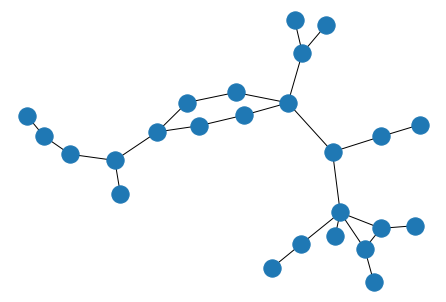

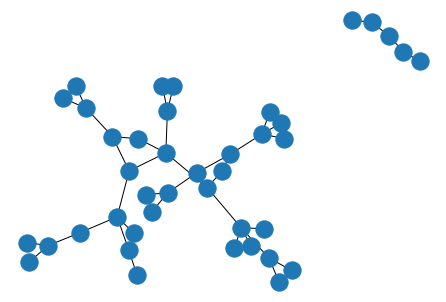

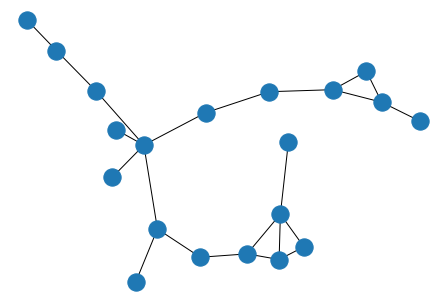

In [7]:
for pl_id in pipeline_ids:
    graph_df = schema_df[schema_df.pipeline_id == pl_id]
    graph_df = graph_df[["node_id_start", "node_id_end", ]]
    graph_df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(graph_df)
    nx.draw(G)
    plt.show()

## Может быть две версии одной трубы. В исходниках они отличались датой, и надо брать последнню. В этом датасете даты пока нет, поэтому берем какую попало

In [8]:
graph_df = schema_df[["pipeline_id", "thread_number", "node_id_start", "node_id_end", 'node_type_start', 'node_type_end', 'X_start', 'Y_start', 'X_end', 'Y_end']]
graph_df = graph_df.drop_duplicates()
graph_df

,pipeline_id,thread_number,node_id_start,node_id_end,node_type_start,node_type_end,X_start,Y_start,X_end,Y_end
4708,1750009593,1,1750042687,1750042688,3,3,571987.360000,6.760834e+06,572048.970000,6.760756e+06
4709,1750009593,1,1750042686,1750013587,3,3,571994.930000,6.760918e+06,572194.090000,6.760738e+06
4710,1750009593,1,1750033582,1750006424,3,2,573534.605734,6.758950e+06,572536.180000,6.759599e+06
4711,1750009593,1,1750033582,1750008720,3,3,573534.605734,6.758950e+06,572549.929974,6.758397e+06
4712,1750009593,1,1750033560,1750033582,3,3,574320.680291,6.759279e+06,573534.605734,6.758950e+06
...,...,...,...,...,...,...,...,...,...,...
4803,1750003207,1,1750040786,1750006361,3,2,569253.730000,6.761770e+06,569265.180000,6.761780e+06
4804,1750003207,1,1750006166,1750006167,2,2,569244.330000,6.761779e+06,569239.360000,6.761779e+06
4805,1750003207,1,1750004725,1750029052,3,3,570784.290000,6.761149e+06,570148.480000,6.761296e+06
4806,1750003207,1,1750029052,1750040786,3,3,570148.480000,6.761296e+06,569253.730000,6.761770e+06


## Если нет координаты одного конца - придумываем их. Это нужно сделать лучше

In [9]:
mask1 = graph_df.X_end.isna()
mask2 = graph_df.X_start.isna()
mask = mask1 | mask2
graph_df.loc[mask, 'X_end'] = graph_df.X_start
graph_df.loc[mask, 'Y_end'] = graph_df.Y_start - 100
graph_df[mask]

,pipeline_id,thread_number,node_id_start,node_id_end,node_type_start,node_type_end,X_start,Y_start,X_end,Y_end
4751,1750003188,1,1750004189,1750006453,1,2,570634.867093,6.763209e+06,570634.867093,6.763109e+06
4752,1750003188,1,1750004191,1750006164,1,2,568612.783126,6.762759e+06,568612.783126,6.762659e+06
4753,1750003188,1,1750004191,1750006165,1,2,568612.783126,6.762759e+06,568612.783126,6.762659e+06
4754,1750003188,1,1750004189,1750006161,1,2,570634.867093,6.763209e+06,570634.867093,6.763109e+06
4797,1750003207,1,1750004269,1750006369,1,2,570577.021533,6.761344e+06,570577.021533,6.761244e+06


In [10]:
pos1 = graph_df[["node_id_start", 'X_start', 'Y_start']]
pos1.columns = ['id', 'x', 'y']
pos2 = graph_df[["node_id_end", 'X_end', 'Y_end']]
pos2.columns = ['id', 'x', 'y']

sp = dict(zip(pos1.id, (zip(pos1.x, pos1.y))))
sp.update(zip(pos2.id, (zip(pos2.x, pos2.y))))


In [11]:
n1 = graph_df[['node_id_start', 'node_type_start']]
n1.columns = ['id', 'type']
n2 = graph_df[['node_id_end', 'node_type_end']]
n2.columns = ['id', 'type']
nodes_df = pd.concat([n1, n2]).drop_duplicates()


pads = nodes_df[nodes_df.type == 1].id.to_list()
wells = nodes_df[nodes_df.type == 2].id.to_list()
juncs = nodes_df[nodes_df.type == 3].id.to_list()
kns = nodes_df[nodes_df.type == 8].id.to_list()

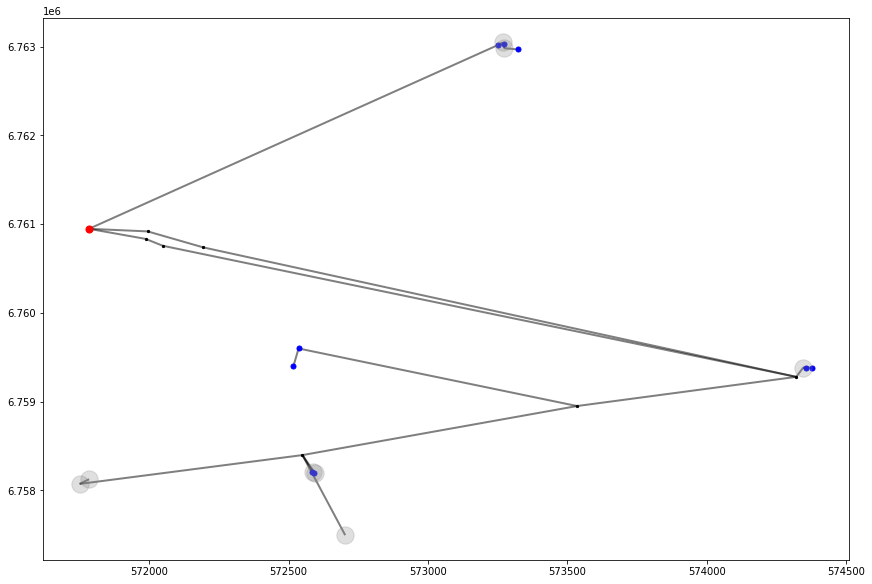

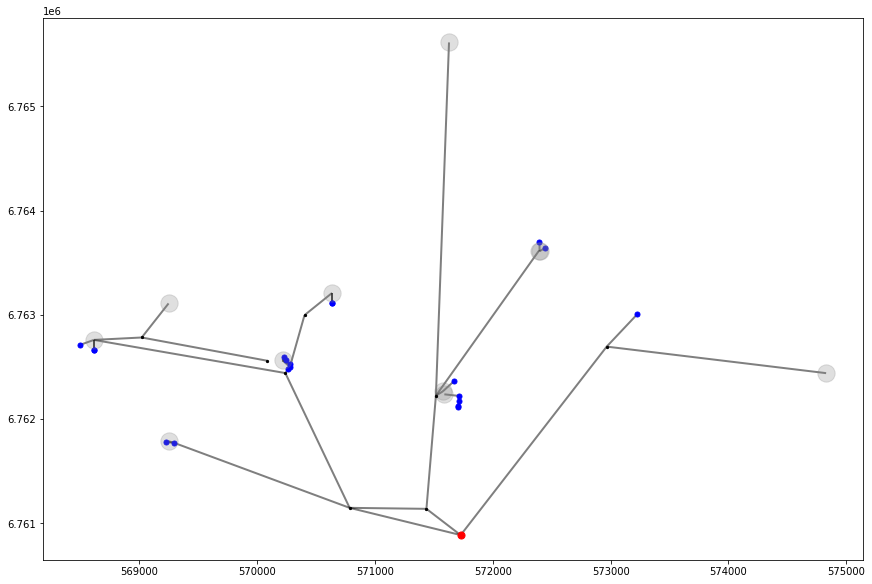

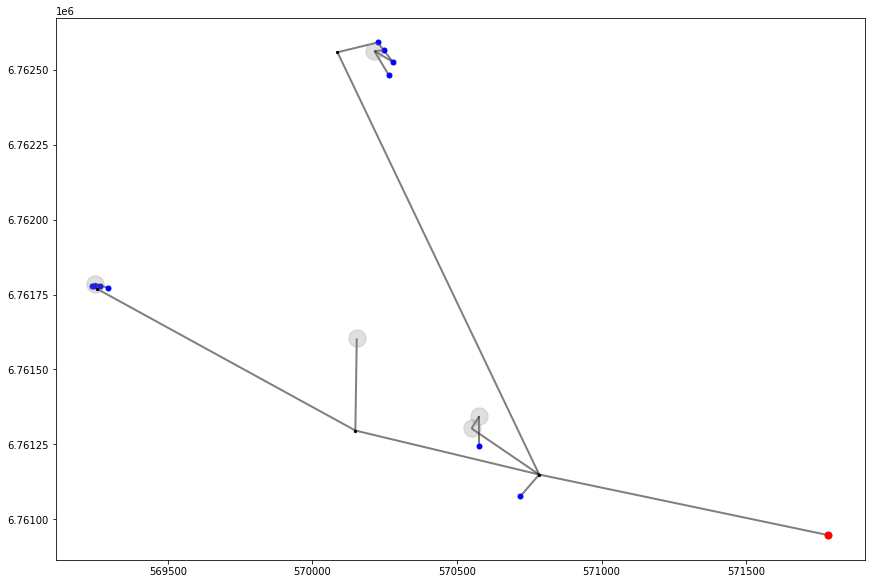

In [12]:
cmap=plt.get_cmap('tab20')
for pl_id in pipeline_ids:
    df = graph_df[graph_df.pipeline_id == pl_id]
    df = df[["node_id_start", "node_id_end"]]
    df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(df)
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    ax = fig.add_subplot(1,1,1)
    g_nodes = set(G.nodes)
    nodelist = list(set(wells) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=25, node_color="blue", ax=ax)
    nodelist = list(set(pads) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=300, node_color="gray", alpha=0.25, ax=ax)
    nodelist = list(set(juncs) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=5, node_color="black", ax=ax)
    nodelist = list(set(kns) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=50, node_color="red", ax=ax)
    nx.draw_networkx_edges(G, sp, alpha=0.5, width=2, ax=ax)
    limits=plt.axis('on') # turns on axis
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    
plt.show()

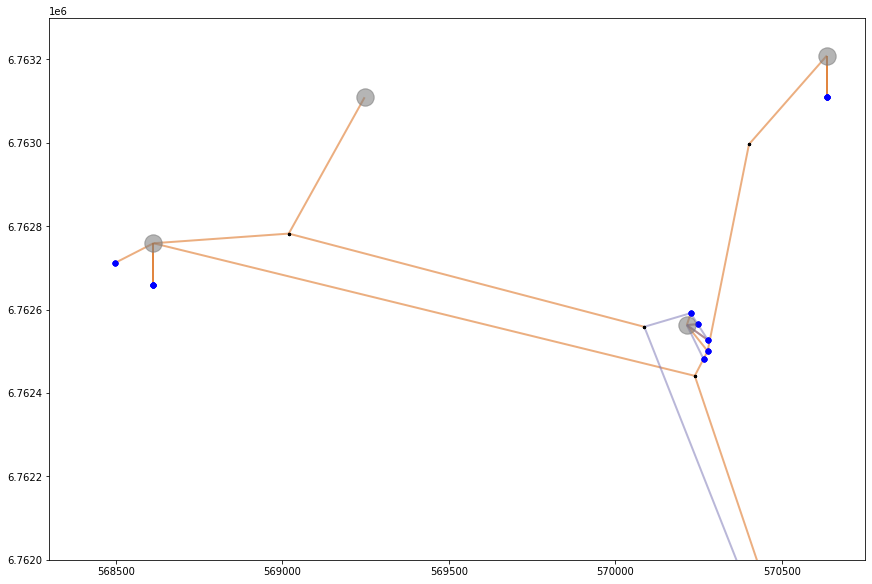

In [13]:
cmap=plt.get_cmap('Dark2').colors

fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for pl_id, clr in zip(pipeline_ids, cmap):
    df = graph_df[graph_df.pipeline_id == pl_id]
    df = df[["node_id_start", "node_id_end"]]
    df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(df)
    nx.draw_networkx_nodes(G, sp, nodelist=wells, node_size=25, node_color="blue", ax=ax)
    nx.draw_networkx_nodes(G, sp, nodelist=pads, node_size=300, node_color="gray", alpha=0.25, ax=ax)
    nx.draw_networkx_nodes(G, sp, nodelist=juncs, node_size=5, node_color="black", ax=ax)
    nx.draw_networkx_nodes(G, sp, nodelist=kns, node_size=50, node_color="red", ax=ax)
    nx.draw_networkx_edges(G, sp, alpha=0.5, width=2, ax=ax, edge_color=clr)

limits=plt.axis('on') # turns on axis
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlim(568300, 570750)
ax.set_ylim(6762000, 6763300)
plt.show()